 Wine Classification

In [1]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import HelpfulFunctions as hp


%matplotlib inline

## 1. Load Wine Dataset

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

# visualizing the data
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
# detailed description of the dataset
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

The Wine dataset contains 178 rows (samples) and 13 columns (features). All features are numerical and there is no null values.  

Our aim is to predict the type of wine (labels) based on the features of our dataset. 

## 2. X matrix and y vector

In [4]:
# loading dataset into a dataframe and naming the columns 
X = pd.DataFrame(wine.data, columns=wine.feature_names)
X.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

In [5]:
X.tail(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
168    13.58        2.58  2.69               24.5      105.0           1.55   
169    13.40        4.60  2.86               25.0      112.0           1.98   
170    12.20        3.03  2.32               19.0       96.0           1.25   
171    12.77        2.39  2.28               19.5       86.0           1.39   
172    14.16        2.51  2.48               20.0       91.0           1.68   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
168        0.84                  0.39             1.54         8.660000  0.74   
169        0.96                  0.27             1.11         8.500000  0.67   
170        0.49                  0.40             0.73         5.500000  0.66   
171        0.51                  0.48             0.64         9.899999  0.57   
172        0.70                  0.44             1.24         9.700000  0.62   
173        0.61                  0.52             1.06         7.700000  0.64   
174        0.75                  0.43             1.41         7.300000  0.70   
175        0.69                  0.43             1.35        10.200000  0.59   
176        0.68                  0.53             1.46         9.300000  0.60   
177        0.76                  0.56             1.35         9.200000  0.61   

     od280/od315_of_diluted_wines  proline  
168                          1.80    750.0  
169                          1.92    630.0  
170                          1.83    510.0  
171                          1.63    470.0  
172                          1.71    660.0  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

In [6]:
X.shape

(178, 13)

In [7]:
# Re-check for missing values just to be sure
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
# labels (y vector)
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [10]:
y.shape

(178,)

Count in each wine class: 
2    48
0    59
1    71
dtype: int64


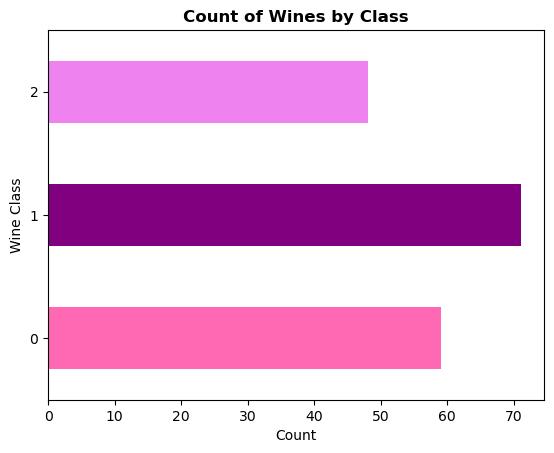

In [11]:
# converting y into a pandas series to plot for visualization
y = pd.Series(y)
print(f"Count in each wine class: \n{y.value_counts().sort_values()}")

# plot 
y.value_counts().sort_index().plot(kind='barh', color=['#FF69B4', 'purple', 'violet'])
plt.title("Count of Wines by Class", fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Wine Class")
plt.show()

## 3. Summary Statistics for numerical features

In [12]:
# generating the summary statistic and adding a column for median
summary_stats=X.describe().round(3).T.astype({'count': int})
summary_stats['median'] = X.median()
summary_stats = summary_stats.reindex(columns=['count','mean','median','std','min','25%','50%','75%','max'])
summary_stats


count     mean   median      std     min  \
alcohol                         178   13.001   13.050    0.812   11.03   
malic_acid                      178    2.336    1.865    1.117    0.74   
ash                             178    2.367    2.360    0.274    1.36   
alcalinity_of_ash               178   19.495   19.500    3.340   10.60   
magnesium                       178   99.742   98.000   14.282   70.00   
total_phenols                   178    2.295    2.355    0.626    0.98   
flavanoids                      178    2.029    2.135    0.999    0.34   
nonflavanoid_phenols            178    0.362    0.340    0.124    0.13   
proanthocyanins                 178    1.591    1.555    0.572    0.41   
color_intensity                 178    5.058    4.690    2.318    1.28   
hue                             178    0.957    0.965    0.229    0.48   
od280/od315_of_diluted_wines    178    2.612    2.780    0.710    1.27   
proline                         178  746.893  673.500  314.907  278.00   

                                  25%      50%      75%      max  
alcohol                        12.362   13.050   13.678    14.83  
malic_acid                      1.602    1.865    3.082     5.80  
ash                             2.210    2.360    2.558     3.23  
alcalinity_of_ash              17.200   19.500   21.500    30.00  
magnesium                      88.000   98.000  107.000   162.00  
total_phenols                   1.742    2.355    2.800     3.88  
flavanoids                      1.205    2.135    2.875     5.08  
nonflavanoid_phenols            0.270    0.340    0.438     0.66  
proanthocyanins                 1.250    1.555    1.950     3.58  
color_intensity                 3.220    4.690    6.200    13.00  
hue                             0.782    0.965    1.120     1.71  
od280/od315_of_diluted_wines    1.938    2.780    3.170     4.00  
proline                       500.500  673.500  985.000  1680.00

## 4. Histogram for individual features

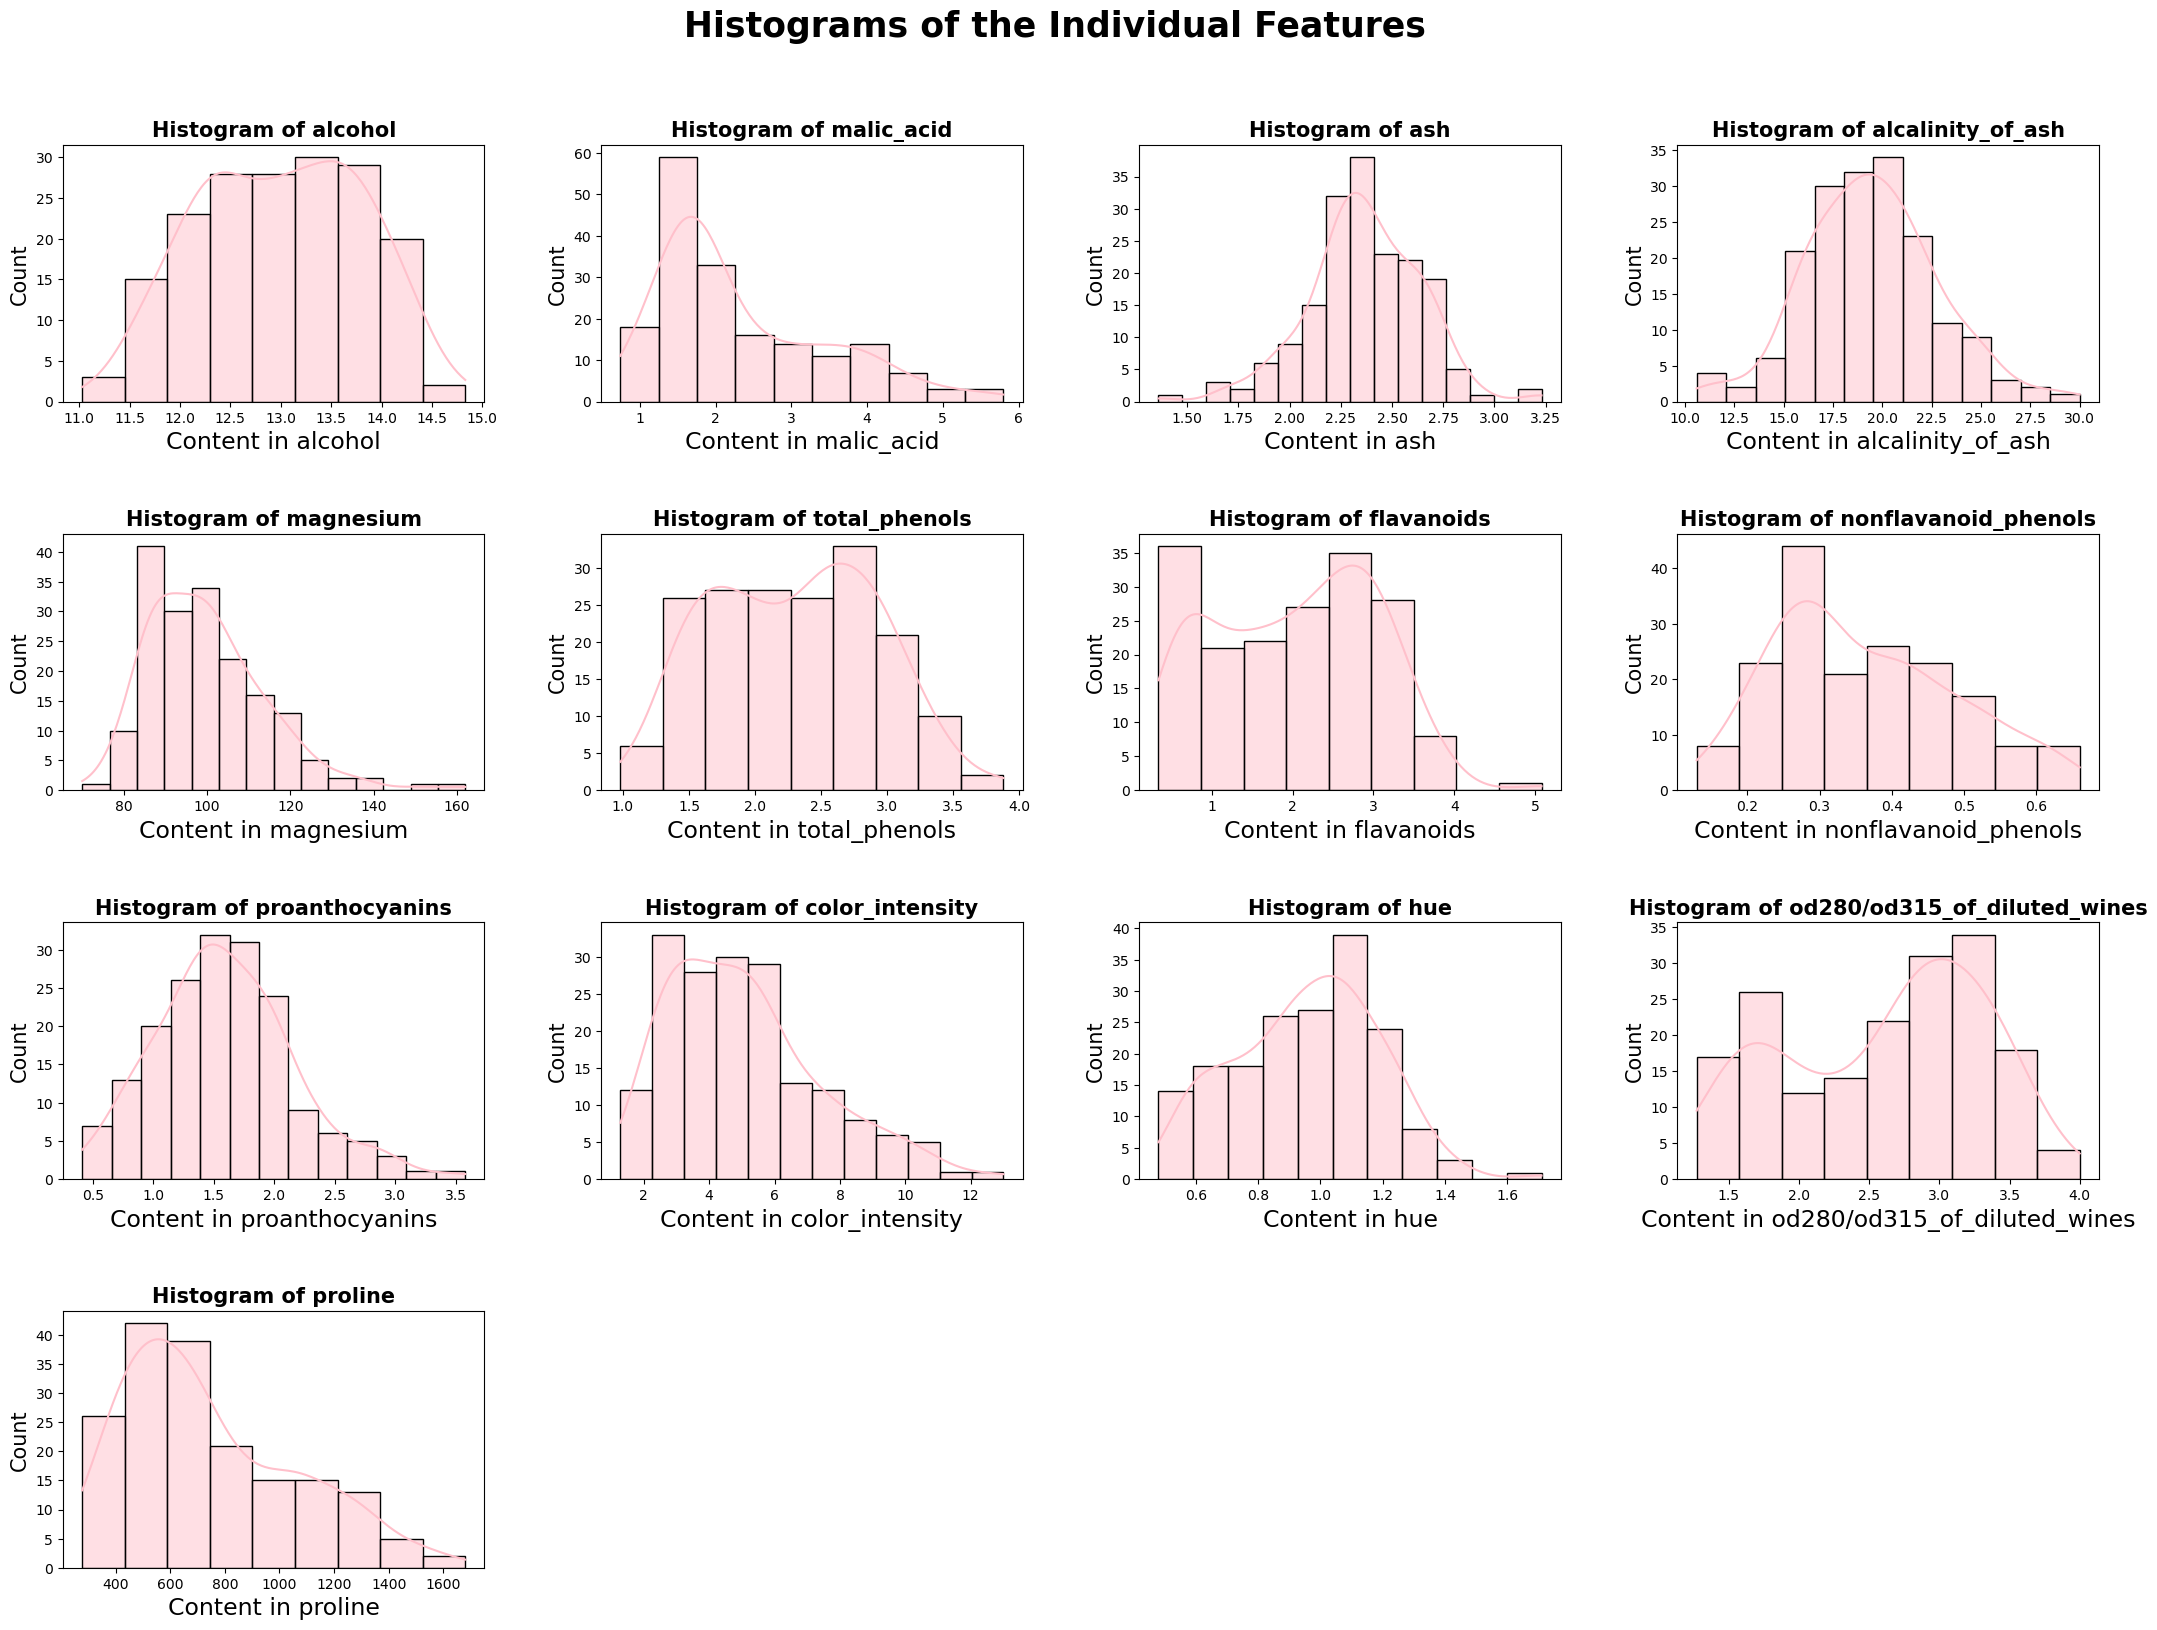

In [13]:
# Plotting histograms for individual features
fig, axs = plt.subplots(4, 4, figsize=(22, 17))
axs = axs.flatten()

# Creating a loop for each feature
for i, feature in enumerate(X.columns):
    sns.histplot(X[feature], kde=True, color='pink', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel(f'Content in {feature}', fontsize=17)  
    axs[i].set_ylabel('Count', fontsize=15) 
    axs[i].set_title(f'Histogram of {feature}', fontsize=15, fontweight='bold')
    
    
# Hiding the remaining subplots
for s in range(13,16):
    axs[s].set_visible(False)
                
plt.suptitle('Histograms of the Individual Features', fontsize= 25,fontweight='bold')
# adjusting the layout of the graphs 
plt.tight_layout(pad=4)
plt.show()

Here, we can observe the distribution of each feature. We notice outliers for flavonoids and hue.

## 5. Feature Space Plots

### 5.1 - Scatterplot

We want to see visually, which combination of features separates the wine classes more distinctly and to understand the interactions between features.

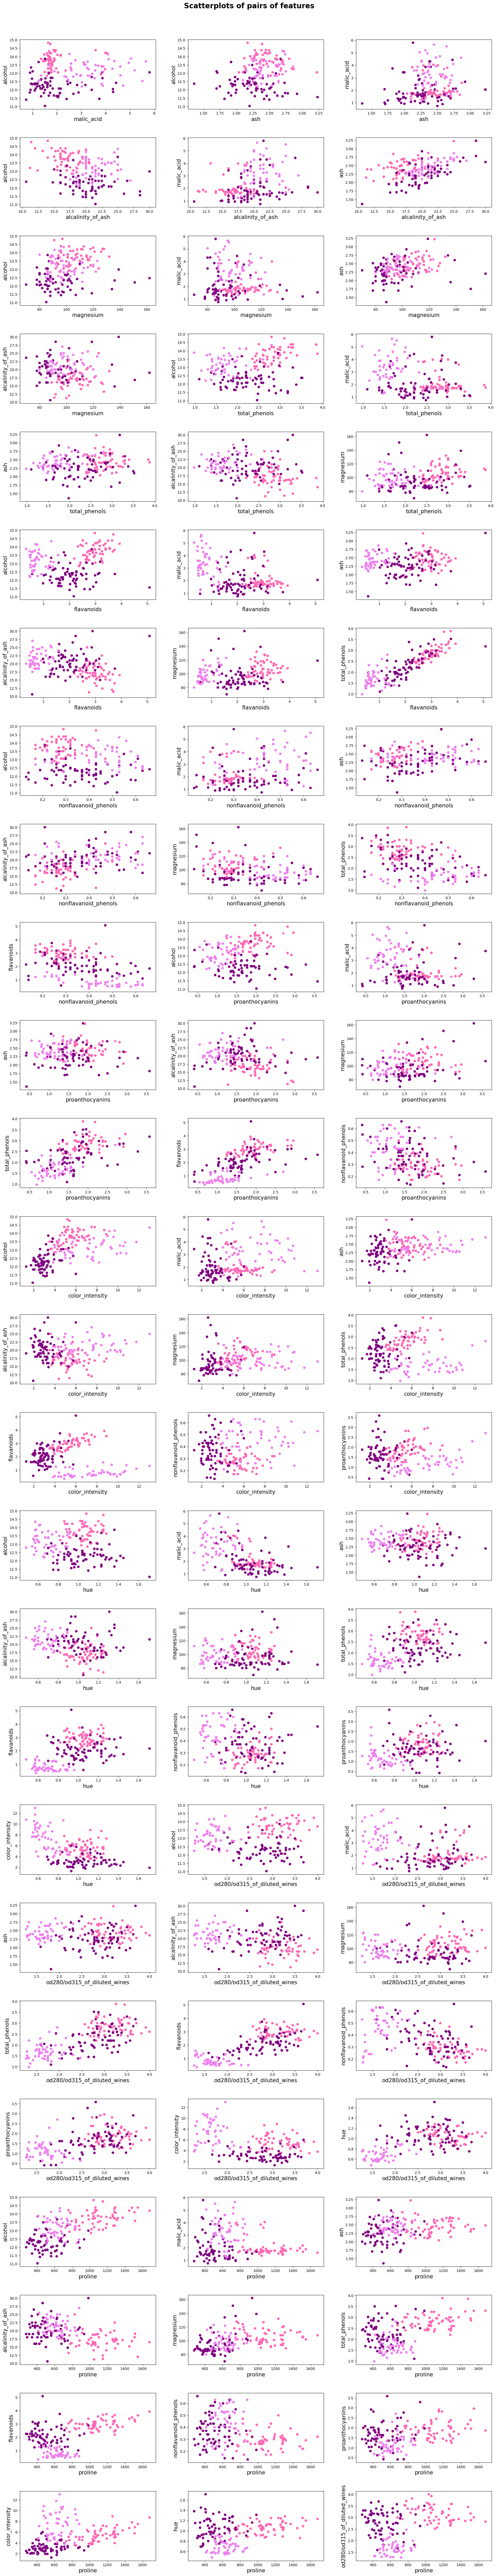

In [14]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF69B4', 'purple', 'violet'])
plt.figure(figsize=(20, 100))

plt_idx = 1

# we are looping over all combinations of pairs (13*12/2)=78
for index1 in range(0,13):
    for index2 in range(0,index1):
        f1 = X.columns[index1]
        f2 = X.columns[index2]
        x1 = X[f1]
        x2 = X[f2]
        plt.subplot(26,3,plt_idx)
        plt.scatter(x1,x2,c = y, cmap = cmap_bold)
        plt.xlabel(f1, fontsize= 15)
        plt.ylabel(f2,fontsize= 15)
        plt_idx = plt_idx+1
        
plt.suptitle('Scatterplots of pairs of features', fontsize= 20,fontweight='bold',  y=1)

# adjusting the layout of the graphs 
plt.tight_layout(pad=4) 
plt.show()

The data points are colored in :  
- Hot pink for class 0
- Purple for class 1 
- Violet for class 2

Visually, we notice that __the pairs that show the most separation between the wine classes are proline/alcohol, flavanoids/alcohol, proline/flavanoids__. The data points cluster in different regions that indicates that these features are informative for differentiating between the wine types.

Additionally, visually, __the pairs that show the least sepration are malic acid/magnesium, nonflavanoid phenols/magnesium, proanthocyanins/alcanility of ash__. These pairs show significant overlap between wine types.  

It seems that __nonflavanoid phenols, alcanility of ash, magnesium and proanthocyanins are not very informative for classifying wine types__.

### 5.2 - Correlation Matrix

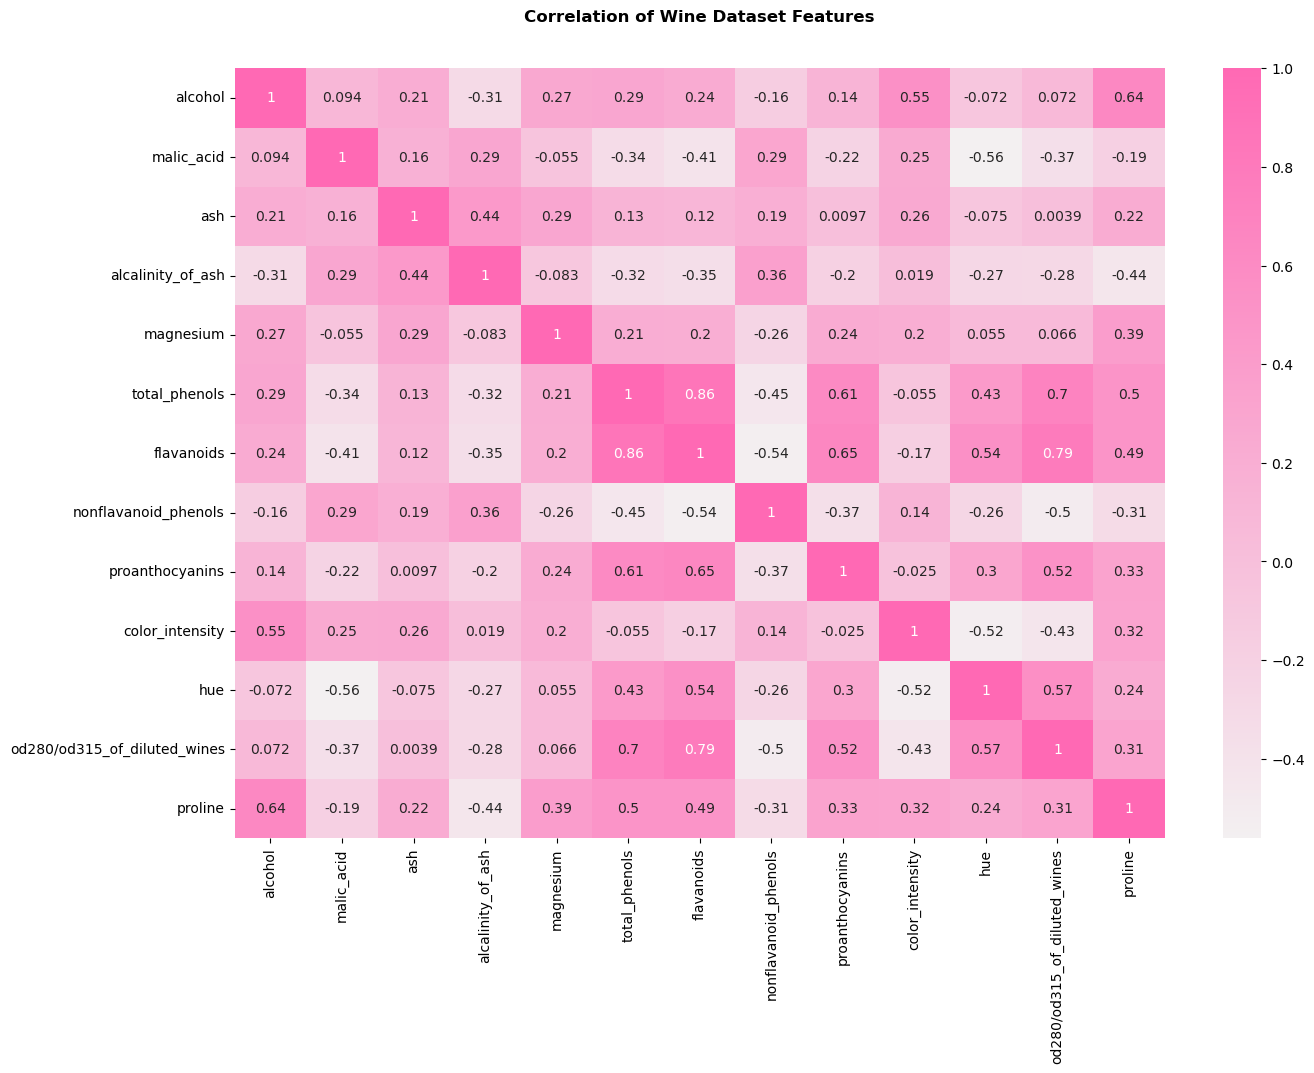

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap= sns.light_palette('#FF69B4', as_cmap=True))
plt.title('Correlation of Wine Dataset Features', y=1.05, fontweight='bold')
plt.show()

We can see that that __there is a strong correlation between flavanoids and total_phenols, flavanoids and od280/od315 of diluted wines__ ,flavanoids and proanthocyanins. This correlation matrix can help identify redundant or highly correlated features that may not provide additional value to our model and avoid mutlicolinearity by dropping one of the higly correlated features.

## 6. Standardization using StandardScaler 

In [16]:
# This is to standardize the values and make them have a normal distribution, mean 0, std 1
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
# converting array into a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head(10)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   
5  1.481555   -0.517367  0.305159          -1.289707   0.860705   
6  1.716255   -0.418624  0.305159          -1.469878  -0.262708   
7  1.308617   -0.167278  0.890014          -0.569023   1.492625   
8  2.259772   -0.625086 -0.718336          -1.650049  -0.192495   
9  1.061565   -0.885409 -0.352802          -1.049479  -0.122282   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   
5       1.562093    1.366128             -0.176095         0.664217   
6       0.328298    0.492677             -0.498407         0.681738   
7       0.488531    0.482637             -0.417829        -0.597284   
8       0.808997    0.954502             -0.578985         0.681738   
9       1.097417    1.125176             -1.143031         0.453967   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874  
5         0.731870  0.406051                      0.336606  2.239039  
6         0.083015  0.274431                      1.367689  1.729520  
7        -0.003499  0.449924                      1.367689  1.745442  
8         0.061386  0.537671                      0.336606  0.949319  
9         0.935177  0.230557                      1.325316  0.949319

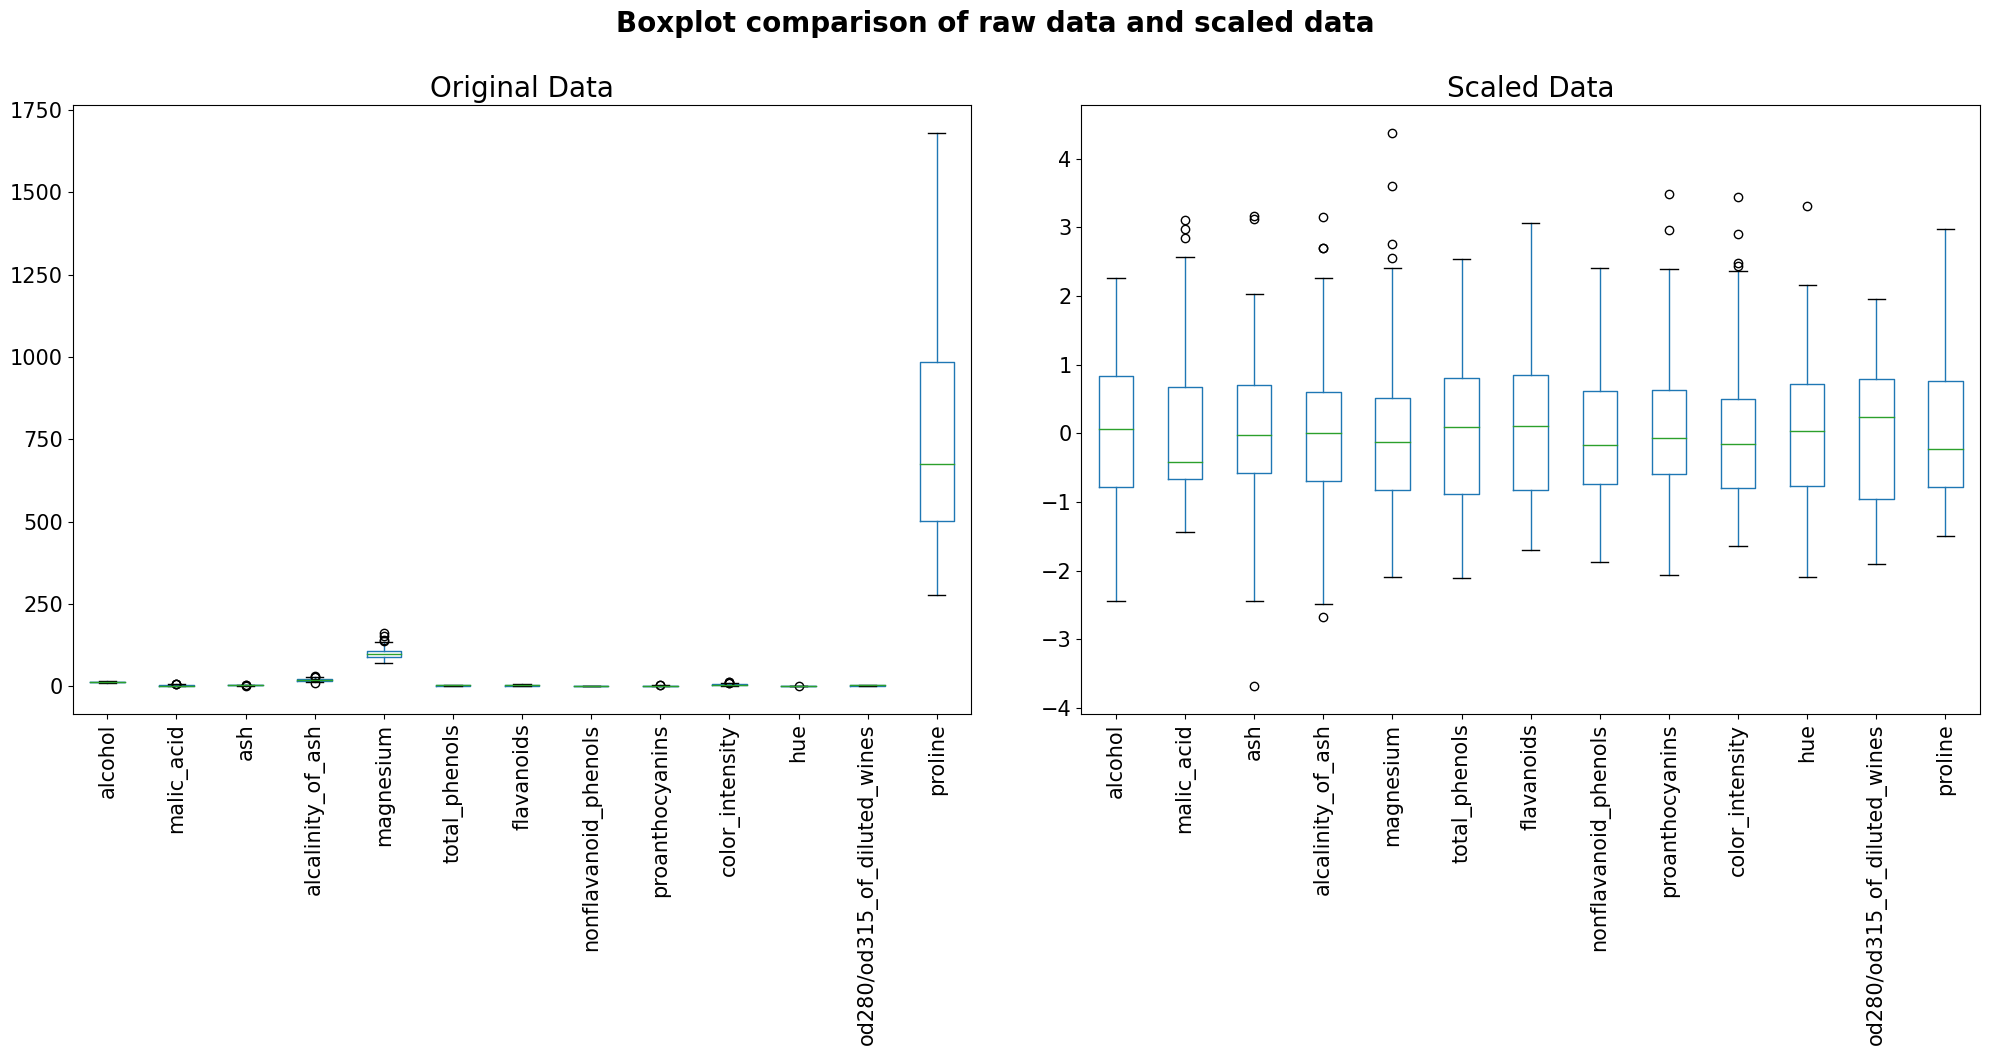

In [18]:
# Boxplot comparison

# Boxplot for raw data
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
X[X.columns].boxplot()
plt.xticks(rotation=90, fontsize=15) 
plt.yticks(fontsize=15)
plt.title('Original Data', fontsize=20)
plt.grid(False)

# Boxplot for scaled data
plt.subplot(1, 2, 2)
X_scaled_df[X_scaled_df.columns].boxplot()
plt.xticks(rotation=90, fontsize=15) 
plt.yticks(fontsize=15)
plt.title('Scaled Data', fontsize=20)
plt.tight_layout(w_pad=5)
plt.grid(False)
plt.suptitle('Boxplot comparison of raw data and scaled data', fontsize= 20,fontweight='bold',  y=1.05)
plt.show()

This visualization clearly shows the impact of standardization on the data. Features that originally had very different scales like Proline and Alcohol, now have similar scales after applying StandardScaler.

## 7. Feature Selection

In [19]:
def correlation(wine_class):
    # Creating a binary (0 or 1) output for the specified wine class
    y_binary = (y == wine_class).astype(int)
    # applying corr() function column-wise (features) in the scaled DataFrame 
    corr = X_scaled_df.apply(lambda col: col.corr(y_binary))
    
    return corr.sort_values(ascending=False)

print(f"Correlation with Wine Class 0: \n{correlation(0)}")
print(f"\nCorrelation with Wine Class 1: \n{correlation(1)}")
print(f"\nCorrelation with Wine Class 2: \n{correlation(2)}")

Correlation with Wine Class 0: 
proline                         0.827000
flavanoids                      0.673770
alcohol                         0.647232
total_phenols                   0.614960
od280/od315_of_diluted_wines    0.543131
proanthocyanins                 0.380500
magnesium                       0.326171
hue                             0.323088
ash                             0.229268
color_intensity                 0.143221
malic_acid                     -0.205847
nonflavanoid_phenols           -0.407680
alcalinity_of_ash              -0.519646
dtype: float64

Correlation with Wine Class 1: 
hue                             0.353213
od280/od315_of_diluted_wines    0.199813
alcalinity_of_ash               0.181764
proanthocyanins                 0.056208
flavanoids                      0.042179
nonflavanoid_phenols            0.011868
total_phenols                  -0.047301
malic_acid                     -0.295175
magnesium                      -0.296972
ash               

Based on domain knowledge, we may be brought to think that alcohol is an important predictor for distinguishing between different wine types. The same goes for flavanoids and proline which are chemicals that affect both the taste and color of wine. 

Based on the correlation with wine classes, the features that may be of interest are proline, flavanoids, alcohol, total_phenols, color intensity, od280/od315 of diluted wines, and hue. These features show strong correlations (positive and negative) with the wine types, making them most informative for classification purposes. 

Based on the features correlation matrix and all the information above, the __best features__ for us (avoiding multicolinearity) __are alcohol, flavanoids, proline, color intenisty and hue__.


In [20]:
# Subset of features selected
selected_features = ['alcohol','flavanoids','proline','color_intensity','hue']
X_scaled_selected = X_scaled_df[selected_features]
X_scaled_selected

alcohol  flavanoids   proline  color_intensity       hue
0    1.518613    1.034819  1.013009         0.251717  0.362177
1    0.246290    0.733629  0.965242        -0.293321  0.406051
2    0.196879    1.215533  1.395148         0.269020  0.318304
3    1.691550    1.466525  2.334574         1.186068 -0.427544
4    0.295700    0.663351 -0.037874        -0.319276  0.362177
..        ...         ...       ...              ...       ...
173  0.876275   -1.424900 -0.021952         1.142811 -1.392758
174  0.493343   -1.284344  0.009893         0.969783 -1.129518
175  0.332758   -1.344582  0.280575         2.224236 -1.612125
176  0.209232   -1.354622  0.296498         1.834923 -1.568252
177  1.395086   -1.274305 -0.595160         1.791666 -1.524378

[178 rows x 5 columns]

## 8. Train-Test Split

__We are performing the train_test_split on the subset of features selected as to improve model performance__ by removing features that are not important for classification.

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing, stratified by class
X_scaled_selected_train, X_scaled_selected_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.2, random_state=1278, stratify=y)

# Checking the shape of the of the splits
print(f"X_scaled__selected_train shape: {X_scaled_selected_train.shape}")
print(f"X_scaled_selected_test shape: {X_scaled_selected_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(" ")

# Checking the counts to confirm stratification
print(f"Training set class distribution: \n{y_train.value_counts().sort_values()}")
print(" ")
print(f"Test set class distribution: \n{y_test.value_counts().sort_values()}")

X_scaled__selected_train shape: (142, 5)
X_scaled_selected_test shape: (36, 5)
y_train shape: (142,)
y_test shape: (36,)
 
Training set class distribution: 
2    38
0    47
1    57
dtype: int64
 
Test set class distribution: 
2    10
0    12
1    14
dtype: int64


## 9. Logistic Regression without regularisation

Since we have a multi-class classification problem, we will use both the liblinear solver and the lbfgs solver to check the best.

In [22]:
from sklearn.linear_model import LogisticRegression

# Using liblinear 
log_reg_liblinear = LogisticRegression(solver='liblinear', max_iter=1000, random_state=1278)
log_reg_liblinear.fit(X_scaled_selected_train, y_train)
y_pred_liblinear = log_reg_liblinear.predict(X_scaled_selected_test)

# Using lbfgs 
log_reg_lbfgs = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=1278)
log_reg_lbfgs.fit(X_scaled_selected_train, y_train)
y_pred_lbfgs = log_reg_lbfgs.predict(X_scaled_selected_test)

y_pred_liblinear

array([0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0])

In [23]:
y_pred_lbfgs

array([0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0])

We have the same output using both solvers but for simplicity, __we will use the lbfgs solver__.

## 10. Logistic Regression with Ridge Regularisation

In [24]:
# Using C values spaced logarithmically because it gives a good spread of values to test
# 10 values between 0.01 and 100
C_values = np.logspace(-2, 2, 10)

# Loop over each value of C
for C in C_values:
    
    log_reg = LogisticRegression(solver='lbfgs', penalty='l2', C=C, max_iter=1000, random_state=1278)
    log_reg.fit(X_scaled_selected_train, y_train)
    
    # Calculating accuracy for the test data
    accuracy = log_reg.score(X_scaled_selected_test, y_test)
    print(f"C = {C:.4f}: Test Accuracy = {accuracy:.4f}")

C = 0.0100: Test Accuracy = 1.0000
C = 0.0278: Test Accuracy = 1.0000
C = 0.0774: Test Accuracy = 1.0000
C = 0.2154: Test Accuracy = 1.0000
C = 0.5995: Test Accuracy = 1.0000
C = 1.6681: Test Accuracy = 1.0000
C = 4.6416: Test Accuracy = 0.9722
C = 12.9155: Test Accuracy = 0.9722
C = 35.9381: Test Accuracy = 0.9722
C = 100.0000: Test Accuracy = 0.9722


__The value of C that gives the best test data accuracy is 4.6416__. We choose this value as it balances generalization and performance, which is why this value is considered the best even though it does not give 100% accuracy. We looked at the trade-off between ensuring the model isn’t too complex and avoiding overfitting.

## 11. Classification Metrics for Logistic Regression

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import HelpfulFunctions as hp

log_reg = LogisticRegression(solver='lbfgs', penalty='l2', C=4.6416, max_iter=1000, random_state=1278)
log_reg.fit(X_scaled_selected_train, y_train)
y_pred_lr = log_reg.predict(X_scaled_selected_test)

confusion_matrix(y_test, y_pred_lr)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 10]])

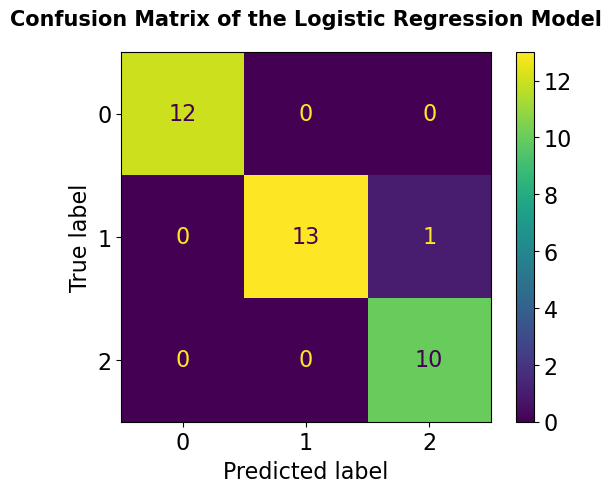

In [26]:
hp.plot_cm(log_reg, X_scaled_selected_test, y_test,labels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix of the Logistic Regression Model',fontweight='bold', fontsize=15, y=1.05)
plt.show()

The model performs well on class 0 and class 2 (no errors). __There is one False Positive (1 sample of class 1 was wrongly predicted as class 2) and one False negative.__

In [27]:
# Precision, Recall and F1 LR model
print(classification_report(y_test, y_pred_lr, target_names=['Class 0', 'Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        12
     Class 1       1.00      0.93      0.96        14
     Class 2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [28]:
# Accuracy LR model
acc = log_reg.score(X_scaled_selected_test,y_test)
print("Accuracy: {:3f}".format(acc))

Accuracy: 0.972222


## 12. Training analysis using KNN, Decision Tree, SVM Model

### 12-1. K Nearest Neighbours

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold # to make sure that each fold has a proportionate distribution of each class

# Dictionnary
k_res = {}

# Looping over different values of K to see the best one 
for K in range(1, 11):
    clf = KNeighborsClassifier(K,weights='distance') # neighbours that are closer have more influence on the prediction
    
    # Performing 5-fold cross-validation
    res = cross_val_score(clf, X_scaled_selected_train, y_train, cv=StratifiedKFold(n_splits=5))
    
    # Storing mean of the cross-validation res
    k_res[K] = res.mean()
    
    print(f"Cross-validation scores for K={K}: {res}")
    print(f"Mean cross-validation for K={K}: {res.mean():.4f}\n")
    print("")

Cross-validation scores for K=1: [0.96551724 1.         0.96428571 0.96428571 0.96428571]
Mean cross-validation for K=1: 0.9717


Cross-validation scores for K=2: [0.96551724 1.         0.96428571 0.96428571 0.96428571]
Mean cross-validation for K=2: 0.9717


Cross-validation scores for K=3: [0.96551724 1.         0.96428571 1.         0.96428571]
Mean cross-validation for K=3: 0.9788


Cross-validation scores for K=4: [0.96551724 1.         0.92857143 1.         0.96428571]
Mean cross-validation for K=4: 0.9717


Cross-validation scores for K=5: [0.96551724 1.         0.96428571 1.         0.92857143]
Mean cross-validation for K=5: 0.9717


Cross-validation scores for K=6: [0.96551724 1.         0.96428571 1.         0.96428571]
Mean cross-validation for K=6: 0.9788


Cross-validation scores for K=7: [0.96551724 0.96551724 0.96428571 1.         0.96428571]
Mean cross-validation for K=7: 0.9719


Cross-validation scores for K=8: [0.96551724 1.         0.96428571 1.         0.96428571]


__Based on the cross-validation results, K=3 provides a better mean cross-validation score and slightly more consistent performance across the validation folds. Thus we will use K=3 to train our model.__

In [30]:
# training analysis KNN with K=3
clf = KNeighborsClassifier(3,weights='distance')
clf.fit(X_scaled_selected_train, y_train)
y_pred_kn = clf.predict(X_scaled_selected_test)
y_pred_kn 


array([0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0])

In [31]:
confusion_matrix(y_test, y_pred_kn)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

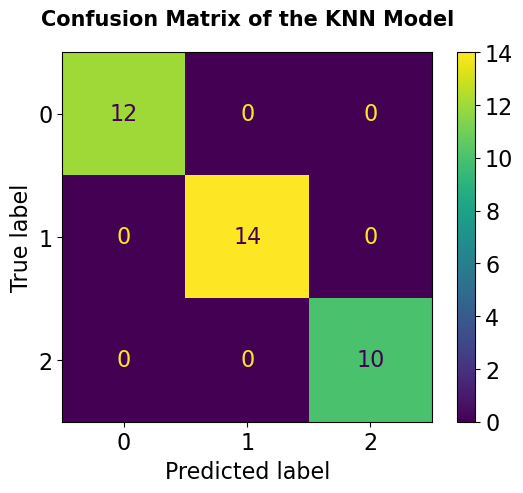

In [32]:
hp.plot_cm(clf, X_scaled_selected_test, y_test,labels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix of the KNN Model', fontsize=15, fontweight='bold', y=1.05)
plt.show()

The model performs well on all classes.

In [33]:
# Precision, Recall and F1 KNN model
print(classification_report(y_test, y_pred_kn, target_names=['Class 0', 'Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        12
     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [34]:
# Accuracy KNN model
acc = clf.score(X_scaled_selected_test,y_test)
print("Accuracy: {:3f}".format(acc))

Accuracy: 1.000000


With the KNN model, all the predictions are accurate.

### 12-2. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Dictionnary
depth_res = {}

# Looping over different values of depth to see the best one 

for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1278)
    clf.fit(X_scaled_selected_train, y_train)
     
    # Performing 5-fold cross-validation
    res = cross_val_score(clf, X_scaled_selected_train, y_train, cv=StratifiedKFold(n_splits=5))
    
    # Storing mean of the cross-validation res
    depth_res[depth] = res.mean()
    
    print(f"Cross-validation scores for depth={depth}: {res}")
    print(f"Mean cross-validation for depth={depth}: {res.mean():.4f}\n")
    print("")
    
best_depth = max(depth_res, key=depth_res.get)
print(f"The best max_depth based on cross-validation is: {best_depth} with mean cross-validation of {depth_res[best_depth]:.4f}")

Cross-validation scores for depth=1: [0.62068966 0.68965517 0.67857143 0.71428571 0.5       ]
Mean cross-validation for depth=1: 0.6406


Cross-validation scores for depth=2: [0.72413793 0.93103448 0.92857143 0.85714286 0.89285714]
Mean cross-validation for depth=2: 0.8667


Cross-validation scores for depth=3: [0.86206897 0.96551724 0.92857143 0.92857143 0.89285714]
Mean cross-validation for depth=3: 0.9155


Cross-validation scores for depth=4: [0.82758621 0.89655172 0.96428571 0.92857143 0.89285714]
Mean cross-validation for depth=4: 0.9020


Cross-validation scores for depth=5: [0.82758621 0.89655172 0.96428571 0.92857143 0.92857143]
Mean cross-validation for depth=5: 0.9091


Cross-validation scores for depth=6: [0.82758621 0.89655172 0.92857143 0.92857143 0.92857143]
Mean cross-validation for depth=6: 0.9020


Cross-validation scores for depth=7: [0.82758621 0.89655172 0.92857143 0.92857143 0.92857143]
Mean cross-validation for depth=7: 0.9020


Cross-validation scores for depth=

Max_depth=3 provides the best balance between model complexity and performance. Increasing the depth beyond 3 does not improve accuracy and might lead to overfitting.

In [36]:
# training analysis Decision Tree with tuned max_depth=3
clf = DecisionTreeClassifier(random_state=1278, max_depth=3)
clf.fit(X_scaled_selected_train, y_train)
y_pred_dt = clf.predict(X_scaled_selected_test)
y_pred_dt 

array([0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0])

In [37]:
confusion_matrix(y_test, y_pred_dt)

array([[11,  0,  1],
       [ 0, 14,  0],
       [ 0,  1,  9]])

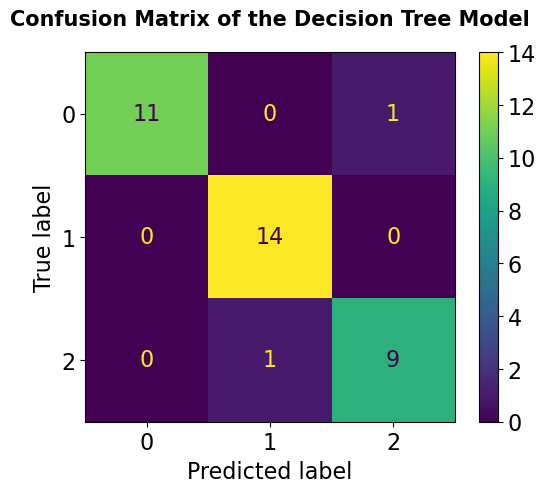

In [38]:
hp.plot_cm(clf, X_scaled_selected_test, y_test,labels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix of the Decision Tree Model', fontsize=15, fontweight='bold', y=1.05)
plt.show()

The model performs well on class 1 (no errors). __There is some confusion between class 0 and class 2, with one misclassification each.__

In [39]:
# Precision, Recall and F1 Decision Tree model
print(classification_report(y_test, y_pred_dt, target_names=['Class 0', 'Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 0       1.00      0.92      0.96        12
     Class 1       0.93      1.00      0.97        14
     Class 2       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [40]:
# Accuracy Decision Tree model
acc = clf.score(X_scaled_selected_test,y_test)
print("Accuracy: {:3f}".format(acc))

Accuracy: 0.944444


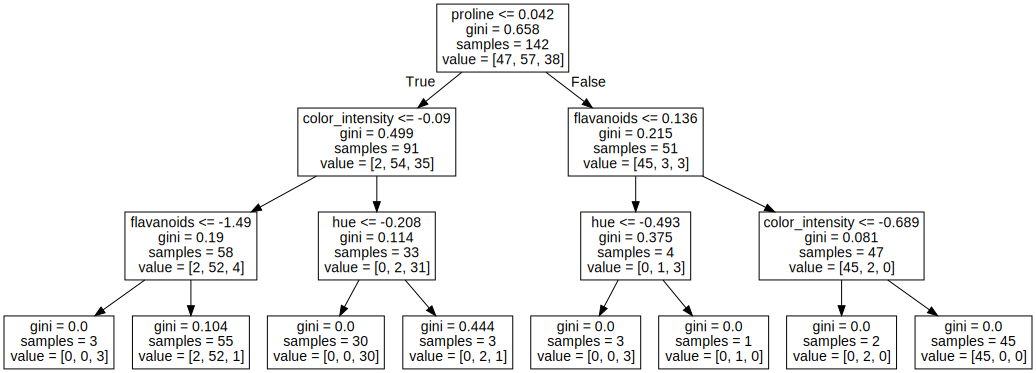

In [41]:
# Visualize the Wine decision tree
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X_scaled_selected.columns))
SVG(graph.pipe(format='svg'))

__The accuracy of the decision tree is lower than that of the KNN model and of the Logistic regression model.__

### 12-3. SVM Model

In [42]:
# Finding the best parameters with gridsearch
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01,0.1,1,10], 'gamma':[0.0000001, 0.000001,0.0001,0.001], 'kernel':['linear','rbf','sigmoid']}
grid = GridSearchCV(SVC(probability=True), parameters, verbose=2, n_jobs=-1, cv=StratifiedKFold(n_splits=5))
grid.fit(X_scaled_selected_train, y_train)

print(f"Best Parameters: {grid.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}


In [43]:
model = grid.best_estimator_
model.fit(X_scaled_selected_train, y_train)
y_pred_sv = model.predict(X_scaled_selected_test)
y_pred_sv

array([0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0])

In [44]:
confusion_matrix(y_test, y_pred_sv)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

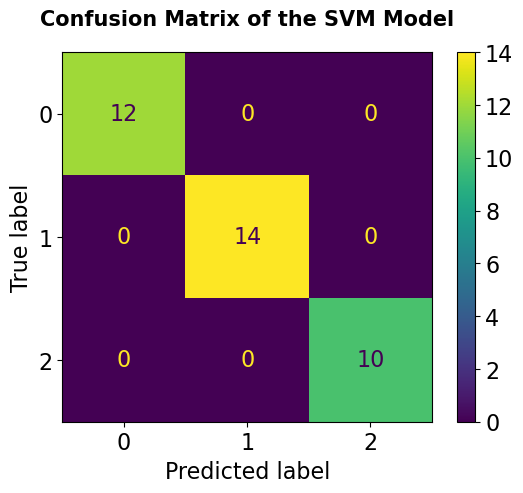

In [45]:
hp.plot_cm(model, X_scaled_selected_test, y_test,labels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix of the SVM Model', fontsize=15, fontweight='bold', y=1.05)
plt.show()

The model performs well on all classes. 

In [46]:
# Precision, Recall and F1 SVM model
print(classification_report(y_test, y_pred_sv, target_names=['Class 0', 'Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        12
     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [47]:
# Accuracy SVM model
acc = model.score(X_scaled_selected_test,y_test)
print("Accuracy: {:3f}".format(acc))

Accuracy: 1.000000


## 13. Best Model Selection

Based on our results throughout our analysis, the best models according to the confusion matrix, accuracy and classification report are the KNN model and the SVM model. These two models have an accuracy on the test data of 100%, the logistic regression one of 97.22% and the Decision Tree one of 94.44% (lowest).

In [48]:
svm_res = cross_val_score(model, X_scaled_selected_train, y_train, cv=StratifiedKFold(n_splits=5))
print(f"Mean Cross-Validation for SVM: {svm_res.mean():.4f}")

Mean Cross-Validation for SVM: 0.9791


To make our final decision on the best model, we will look at the stability of each model across different folds. The one that performs the best is the SVM model (Mean Cross-Validation for SVM: 0.9791) compared to KNN (Mean cross-validation for K=3: 0.9788). __The best classification model is SVM.__

## Conclusion

To conclude, this document showcases how various machine learning algorithms can be used to predict wine types based on chemical features. It also shows the importance of feature selection, hyperparameter tuning, and regularization in building robust models. 

Our analysis of the wine dataset shows that __features like proline, flavanoids, and alcohol were the most informative for classification__, based on correlation analysis and visual inspections. __Less informative features were identified and excluded to improve model performance and reduce the risk of overfitting.__

In terms of model performance, __the best performing model was SVM, achieving 100% accuracy and providing robust and stable results across different folds__, closely followed by KNN. Logistic Regression with regularization performed well with a test accuracy of 97.22%, indicating strong generalization without overfitting.
